In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rotten_tomatoes_top_movies.csv.zip to rotten_tomatoes_top_movies.csv (1).zip


In [ ]:
df = pd.read_csv('rotten_tomatoes_top_movies.csv.zip')

In [ ]:
df.head()


,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...
3,3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,...,"May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",http://www.rottentomatoes.com/m/mad_max_fury_road
4,4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,...,"Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al...",http://www.rottentomatoes.com/m/spider_man_int...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1610 non-null   int64  
 1   title                     1610 non-null   object 
 2   year                      1610 non-null   int64  
 3   synopsis                  1602 non-null   object 
 4   critic_score              1610 non-null   int64  
 5   people_score              1609 non-null   float64
 6   consensus                 1593 non-null   object 
 7   total_reviews             1610 non-null   int64  
 8   total_ratings             1610 non-null   object 
 9   type                      1610 non-null   object 
 10  rating                    1139 non-null   object 
 11  genre                     1603 non-null   object 
 12  original_language         1570 non-null   object 
 13  director                  1609 non-null   object 
 14  producer

In [ ]:
# usefull columns for me
keep_cols = [
    "title",
    "year",
    "critic_score",
    "people_score",
    "total_reviews",
    "total_ratings",
    "genre",
    "type",
    "runtime"

]

# Drop all other columns
df_clean = df[keep_cols].copy()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1610 non-null   object 
 1   year           1610 non-null   int64  
 2   critic_score   1610 non-null   int64  
 3   people_score   1609 non-null   float64
 4   total_reviews  1610 non-null   int64  
 5   total_ratings  1610 non-null   object 
 6   genre          1603 non-null   object 
 7   type           1610 non-null   object 
 8   runtime        1603 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 113.3+ KB


In [ ]:
df_clean.describe()

,year,critic_score,people_score,total_reviews
count,1610.000000,1610.000000,1609.000000,1610.000000
mean,1991.745963,92.693789,83.405221,143.652174
std,28.054120,11.621759,11.263792,118.137144
min,1919.000000,2.000000,10.000000,39.000000
25%,1969.000000,92.000000,80.000000,56.000000
50%,2005.000000,96.000000,87.000000,90.000000
75%,2014.000000,98.000000,91.000000,205.750000
max,2020.000000,100.000000,98.000000,561.000000


In [ ]:
# Re-create df_clean from the original df and apply cleaning steps
keep_cols = [
    "title",
    "year",
    "critic_score",
    "people_score",
    "total_reviews",
    "total_ratings",
    "genre",
    "type",
    "runtime"
]

df_clean = df[keep_cols].copy()

# 1. Drop rows where people_score is missing
df_clean = df_clean.dropna(subset=["people_score"])

# 2. Fill missing genre with "Unknown"
df_clean["genre"] = df_clean["genre"].fillna("Unknown")

# 3. Convert runtime to numeric (extract digits and convert to float)
# Ensure handling of cases where runtime might already be numeric or not contain 'm' or 'h'
if df_clean["runtime"].dtype == object:
    df_clean["runtime"] = df_clean["runtime"].astype(str).str.extract(r'(\d+)').astype(float)
else:
    df_clean["runtime"] = df_clean["runtime"].astype(float)

# 4. Fill missing runtime with median
df_clean["runtime"] = df_clean["runtime"].fillna(df_clean["runtime"].median())


movies_to_remove = ['Host', 'NASCAR', 'Ultimate X: The Movie']
df_clean = df_clean[~df_clean['title'].isin(movies_to_remove)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, 0 to 1609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1606 non-null   object 
 1   year           1606 non-null   int64  
 2   critic_score   1606 non-null   int64  
 3   people_score   1606 non-null   float64
 4   total_reviews  1606 non-null   int64  
 5   total_ratings  1606 non-null   object 
 6   genre          1606 non-null   object 
 7   type           1606 non-null   object 
 8   runtime        1606 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 125.5+ KB


In [ ]:
df_clean.describe()


,year,critic_score,people_score,total_reviews,runtime
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,1991.696762,92.717933,83.434620,143.863014,1.284558
std,28.068467,11.597970,11.224879,118.205518,0.489743
min,1919.000000,2.000000,10.000000,39.000000,1.000000
25%,1969.000000,92.000000,80.000000,56.000000,1.000000
50%,2005.000000,96.000000,87.000000,91.000000,1.000000
75%,2014.000000,98.000000,91.000000,206.000000,2.000000
max,2020.000000,100.000000,98.000000,561.000000,3.000000


In [ ]:
df_clean.isnull().sum()

,0
title,0
year,0
critic_score,0
people_score,0
total_reviews,0
total_ratings,0
genre,0
type,0
runtime,0


In [ ]:
df_clean.isnull().sum()

,0
title,0
year,0
critic_score,0
people_score,0
total_reviews,0
total_ratings,0
genre,0
type,0
runtime,0


In [ ]:
summary_stats = {
    "critic_score_mean": df_clean["critic_score"].mean(),
    "critic_score_median": df_clean["critic_score"].median(),
    "critic_score_mode": df_clean["critic_score"].mode()[0],

    "people_score_mean": df_clean["people_score"].mean(),
    "people_score_median": df_clean["people_score"].median(),
    "people_score_mode": df_clean["people_score"].mode()[0]
}

summary_stats


{'critic_score_mean': np.float64(92.71793275217932),
 'critic_score_median': 96.0,
 'critic_score_mode': np.int64(98),
 'people_score_mean': np.float64(83.43462017434621),
 'people_score_median': 87.0,
 'people_score_mode': np.float64(87.0)}

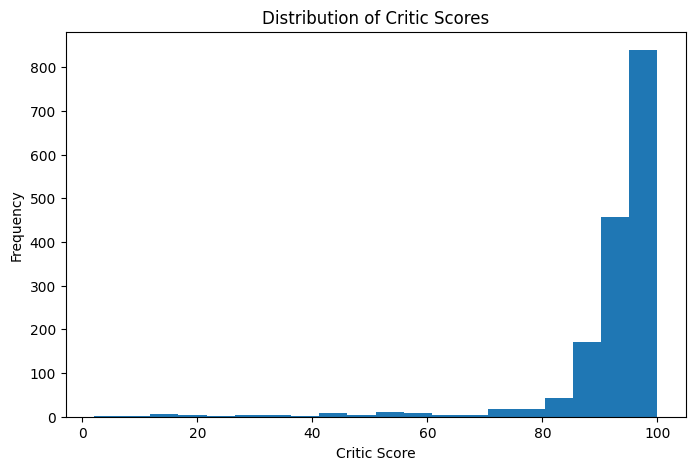

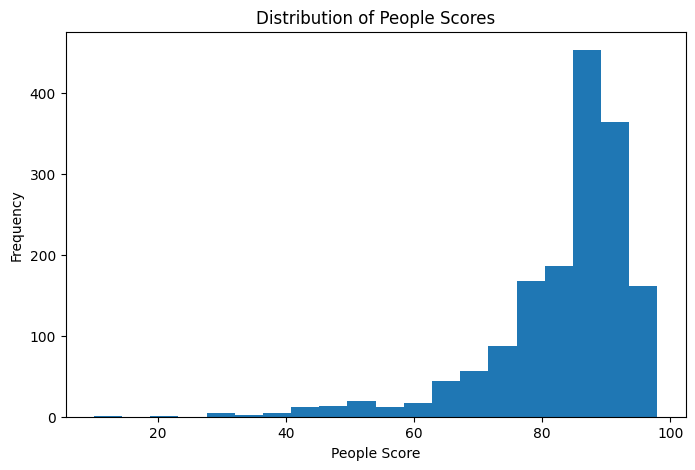

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["critic_score"], bins=20)
plt.title("Distribution of Critic Scores")
plt.xlabel("Critic Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df_clean["people_score"], bins=20)
plt.title("Distribution of People Scores")
plt.xlabel("People Score")
plt.ylabel("Frequency")
plt.show()


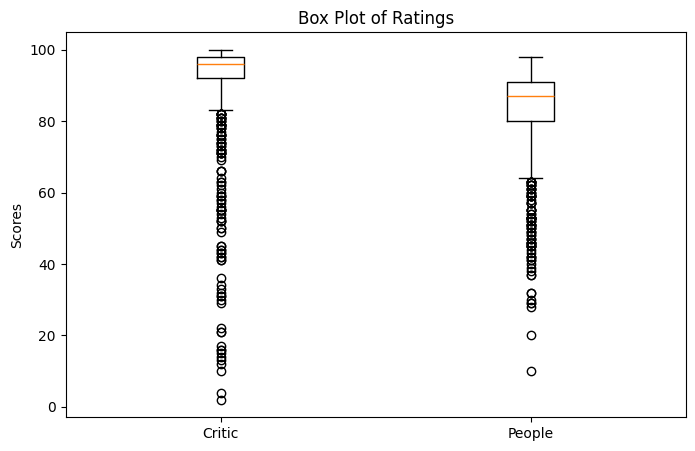

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot([df_clean["critic_score"], df_clean["people_score"]], labels=["Critic", "People"])
plt.title("Box Plot of Ratings")
plt.ylabel("Scores")
plt.show()


In [ ]:
top_movies = df_clean.sort_values(by="people_score", ascending=False)[["title", "people_score", "genre"]].head(10)
top_movies


,title,people_score,genre
610,The Godfather,98.0,"crime, drama"
922,Stop Making Sense,98.0,"music, documentary"
520,Stop Making Sense,98.0,"music, documentary"
655,Seven Samurai,97.0,action
666,12 Angry Men,97.0,drama
525,Maiden,97.0,documentary
1260,The Empire Strikes Back,97.0,"action, sci fi, adventure, fantasy"
234,Ikiru,97.0,"gay and lesbian, drama"
20,Seven Samurai,97.0,action
1019,"The Godfather, Part II",97.0,"crime, drama"


In [ ]:
top_critic = df_clean.sort_values(by="critic_score", ascending=False)[["title", "critic_score", "genre"]].head(10)
top_critic


,title,critic_score,genre
666,12 Angry Men,100,drama
26,The Treasure of the Sierra Madre,100,"western, adventure, drama"
20,Seven Samurai,100,action
667,The 400 Blows,100,"crime, drama"
1401,Athlete A,100,documentary
285,Fireworks Wednesday,100,drama
287,Last Train Home,100,documentary
1066,Stalker,100,"sci fi, adventure"
291,Nostalgia for the Light,100,documentary
565,My Journey Through French Cinema,100,documentary


In [ ]:
genre_ratings = df_clean.groupby("genre")["people_score"].mean().sort_values(ascending=False).head(10)
genre_ratings


,people_score
genre,
"other, comedy, adventure, animation, kids and family",96.0
"comedy, drama, adventure",96.0
"action, comedy, fantasy, adventure",95.0
"drama, war, anime",95.0
"adventure, animation, fantasy, comedy, kids and family",95.0
"fantasy, action, adventure",94.0
"comedy, music, animation, kids and family, adventure",94.0
"sci fi, romance",94.0
"drama, war",94.0


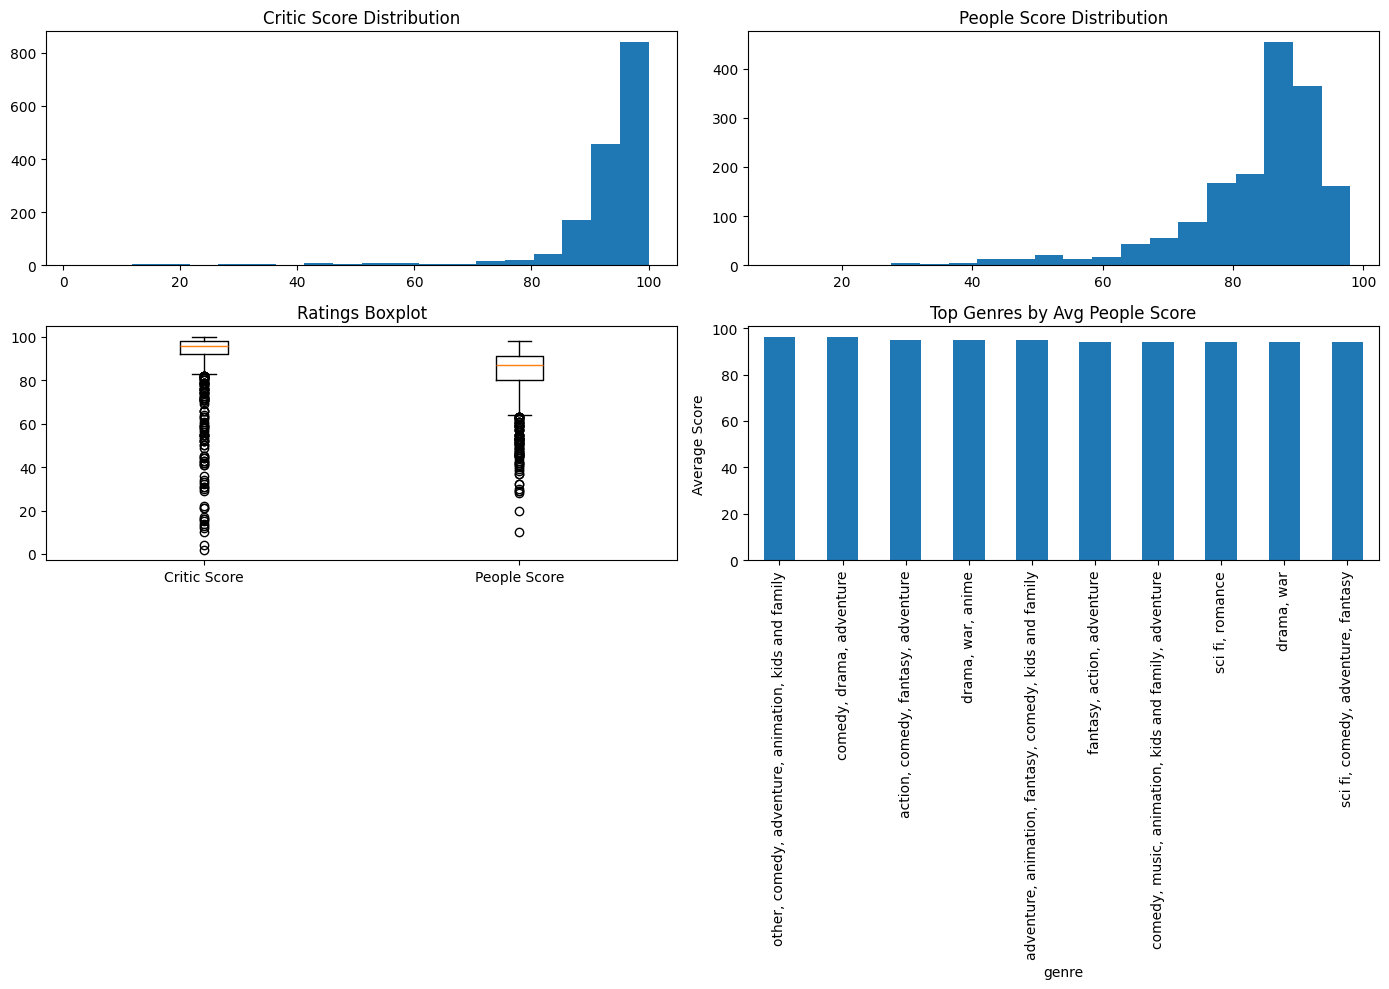

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Histogram - Critic Score
axes[0,0].hist(df_clean["critic_score"], bins=20)
axes[0,0].set_title("Critic Score Distribution")

# Histogram - People Score
axes[0,1].hist(df_clean["people_score"], bins=20)
axes[0,1].set_title("People Score Distribution")

# Box plot
axes[1,0].boxplot(
    [df_clean["critic_score"], df_clean["people_score"]],
    labels=["Critic Score", "People Score"]
)
axes[1,0].set_title("Ratings Boxplot")

# Top genres bar chart
genre_ratings.plot(kind="bar", ax=axes[1,1])
axes[1,1].set_title("Top Genres by Avg People Score")
axes[1,1].set_ylabel("Average Score")

plt.tight_layout()
plt.show()


In [ ]:
keep_cols = [
    "title","year","critic_score","people_score","total_reviews",
    "total_ratings","genre","type","runtime","synopsis","consensus","box_office_(gross_usa)"
]
df = df.copy()
df = df[keep_cols]

# Standardize column types
# Convert numeric-ish columns (strip commas, $ etc)
def to_numeric_col(s):
    return (s.astype(str)
             .str.replace(r'[^\d\.\-]', '', regex=True)
             .replace('', np.nan)
             .astype(float))

# runtime cleaning (extract digits)
if df["runtime"].dtype == object:
    df["runtime"] = df["runtime"].str.extract(r'(\d+)').astype(float)

# total_ratings may be numeric-like but stored as object — convert
if df["total_ratings"].dtype == object:
    df["total_ratings"] = to_numeric_col(df["total_ratings"])

# box office to numeric
if "box_office_(gross_usa)" in df.columns:
    df["box_office_(gross_usa)"] = to_numeric_col(df["box_office_(gross_usa)"])

# total_reviews to numeric if not
df["total_reviews"] = pd.to_numeric(df["total_reviews"], errors="coerce")
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["people_score"] = pd.to_numeric(df["people_score"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# fill small missing values as earlier
df = df.dropna(subset=["people_score"])          # drop rows missing target
df["genre"] = df["genre"].fillna("Unknown")
df["runtime"] = df["runtime"].fillna(df["runtime"].median())

# ensure synopsis and consensus exist as text
df["synopsis"] = df["synopsis"].fillna("")
df["consensus"] = df["consensus"].fillna("")
# create combined_text for sentiment/recommendation
df["text_combined"] = (df["synopsis"] + " " + df["consensus"]).str.strip()


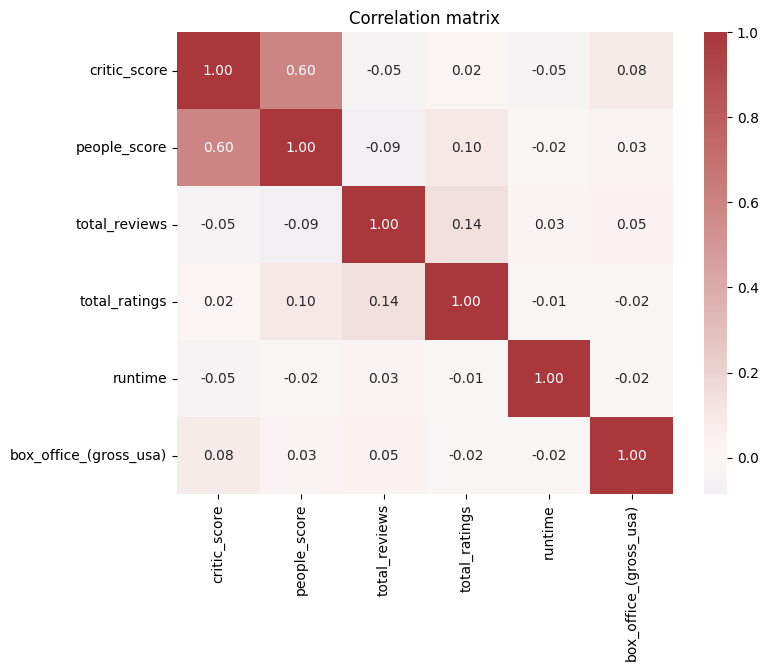

In [ ]:
num_cols = ["critic_score","people_score","total_reviews","total_ratings","runtime","box_office_(gross_usa)"]
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation matrix")
plt.show()


In [ ]:
# NLTK VADER
import nltk
nltk.download("vader_lexicon")

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# compute compound sentiment score
df["sentiment"] = df["text_combined"].apply(lambda x: get_sentiment_scores(x)["compound"])

# Quick check
df[["title","people_score","critic_score","sentiment"]].head(10)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,title,people_score,critic_score,sentiment
0,Black Panther,79.0,96,-0.8779
1,Avengers: Endgame,90.0,94,0.3612
2,Mission: Impossible -- Fallout,88.0,97,-0.9607
3,Mad Max: Fury Road,86.0,97,-0.8979
4,Spider-Man: Into the Spider-Verse,93.0,97,0.8545
5,Wonder Woman,83.0,93,-0.2732
6,Dunkirk,81.0,92,0.9408
7,Coco,94.0,97,0.9100
8,Thor: Ragnarok,87.0,93,0.7906
9,Logan,90.0,93,0.7086


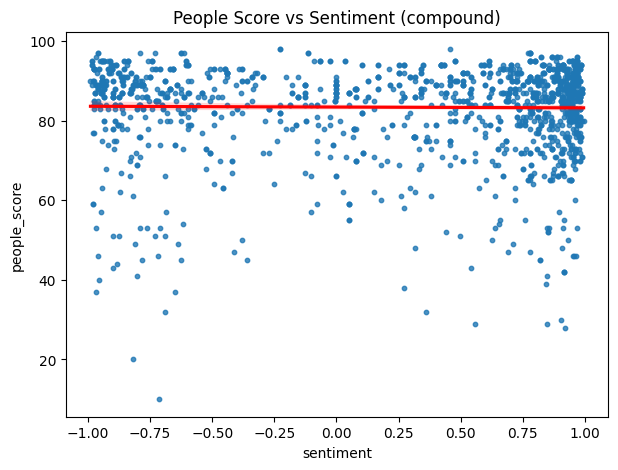

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="sentiment", y="people_score", scatter_kws={"s":10}, line_kws={"color":"red"})
plt.title("People Score vs Sentiment (compound)")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

tfidf = TfidfVectorizer(min_df=3, stop_words='english', max_features=20000)
tfidf_matrix = tfidf.fit_transform(df["text_combined"])

# cosine similarity matrix (dense on queries)
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  # shape (n, n)

# index mapping
# Ensure unique mapping from title to a single index, picking the first occurrence for duplicates
title_to_idx = df.reset_index().drop_duplicates(subset=['title']).set_index('title')['index']

def recommend_by_title(title, topn=10):
    if title not in title_to_idx:
        return f"Title '{title}' not found. Try close matches."
    idx = title_to_idx[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:topn+1]  # skip itself
    movie_indices = [i for i, score in sim_scores]
    return df.iloc[movie_indices][["title","year","genre","people_score"]]

# example
recommend_by_title(df["title"].iloc[0], topn=5)


,title,year,genre,people_score
600,Black Panther,2018,"adventure, action, fantasy",79.0
1200,Black Panther,2018,"adventure, action, fantasy",79.0
971,Black Is King,2020,music,90.0
1603,The Dark Tower,2017,"adventure, action, fantasy",45.0
1504,Tupac: Resurrection,2003,documentary,90.0


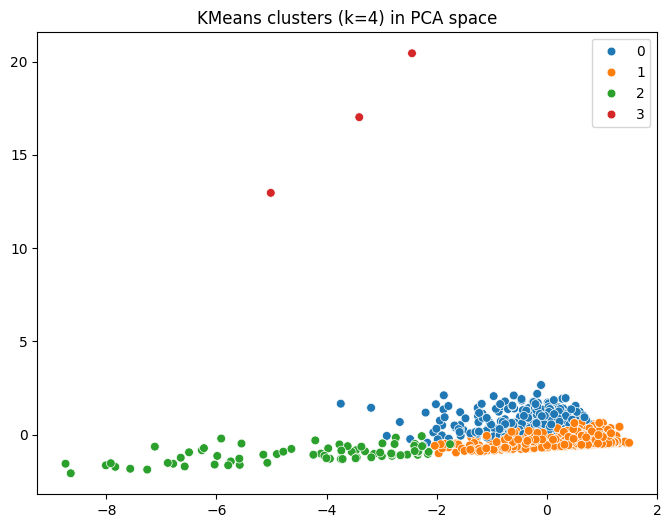

,critic_score,people_score,runtime,total_reviews,count
cluster,,,,,
0,92.275943,81.398585,1.426887,315.606132,424
1,95.714029,86.071043,1.234712,81.300360,1112
2,47.800000,53.885714,1.214286,97.442857,70
3,78.333333,67.666667,48.333333,59.333333,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

features = ["critic_score","people_score","runtime","total_reviews"]
features = [f for f in features if f in df.columns]

X = df[features].fillna(0).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# reduce dimension for K selection and plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Choose K (e.g., 3 or 4)
k = 4
km = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = km.fit_predict(X_scaled)
df["cluster"] = clusters

# visualize clusters in PCA space
plt.figure(figsize=(8,6))
palette = sns.color_palette("tab10", k)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette=palette, s=40)
plt.title(f"KMeans clusters (k={k}) in PCA space")
plt.show()

# cluster summary
cluster_summary = df.groupby("cluster")[features + ["title"]].agg({
    "critic_score":"mean", "people_score":"mean", "runtime":"mean", "total_reviews":"mean", "title":"count"
}).rename(columns={"title":"count"})
cluster_summary


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np # Import numpy for np.sqrt

# Features to use
cat_feats = ["genre","type"]
num_feats = ["year","critic_score","runtime","total_reviews","total_ratings","sentiment"]
cat_feats = [c for c in cat_feats if c in df.columns]
num_feats = [c for c in num_feats if c in df.columns]

X = df[cat_feats + num_feats]
y = df["people_score"]

# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_feats)
])

# Models to evaluate
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}
results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("pre", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    # Calculate RMSE manually by taking the square root of MSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"rmse": rmse, "mae": mae, "r2": r2}
    # save model
    joblib.dump(pipe, f"{name}_people_score_model.joblib")

results

{'LinearRegression': {'rmse': np.float64(7.684023510864497),
  'mae': 5.424267942667055,
  'r2': 0.4743695010340816},
 'RandomForest': {'rmse': np.float64(6.59829439306216),
  'mae': 4.115388198757764,
  'r2': 0.6124153549087771}}

In [ ]:
from xgboost import XGBRegressor
# add XGBRegressor with tuned params similarly


In [ ]:
df["gap"] = df["people_score"] - df["critic_score"]  # positive = audience liked more
# Top audience-loved but critic-disliked
df.sort_values("gap", ascending=False)[["title","people_score","critic_score","gap","genre"]].head(20)

# Top critic-loved but audience-disliked
df.sort_values("gap", ascending=True)[["title","people_score","critic_score","gap","genre"]].head(20)

# Aggregate by genre
genre_gap = df.groupby("genre")["gap"].mean().sort_values(ascending=False)
genre_gap.head(10)


,gap
genre,
"horror, action, fantasy",31.000000
"comedy, romance, musical",29.000000
"western, adventure",27.000000
"kids and family, comedy, drama",26.000000
"drama, history, western",18.500000
"western, action, fantasy, sports and fitness",16.000000
"comedy, western, action",11.000000
"mystery and thriller, western",10.000000
"western, action",9.857143


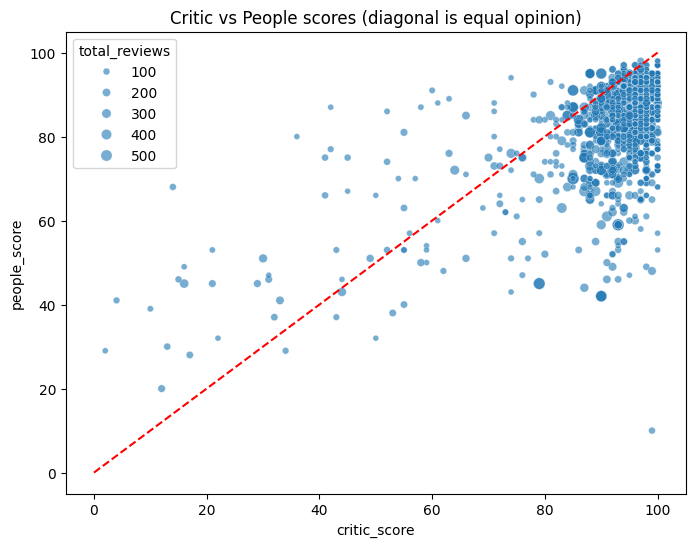

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="critic_score", y="people_score", size="total_reviews", alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")
plt.title("Critic vs People scores (diagonal is equal opinion)")
plt.show()


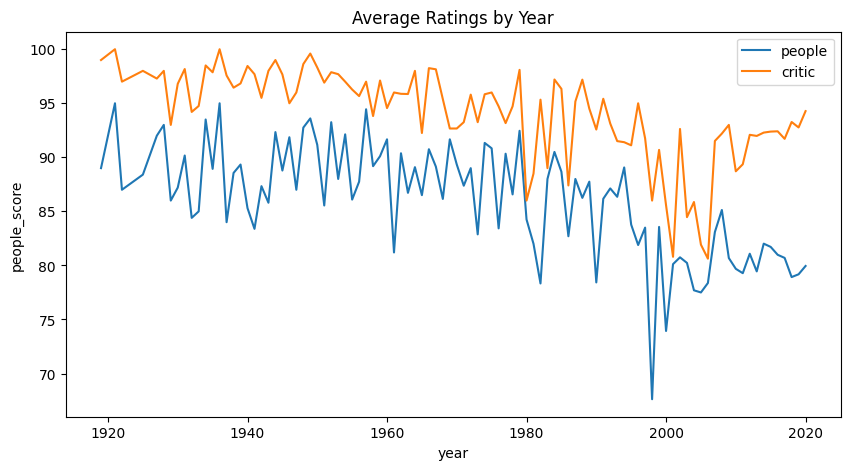

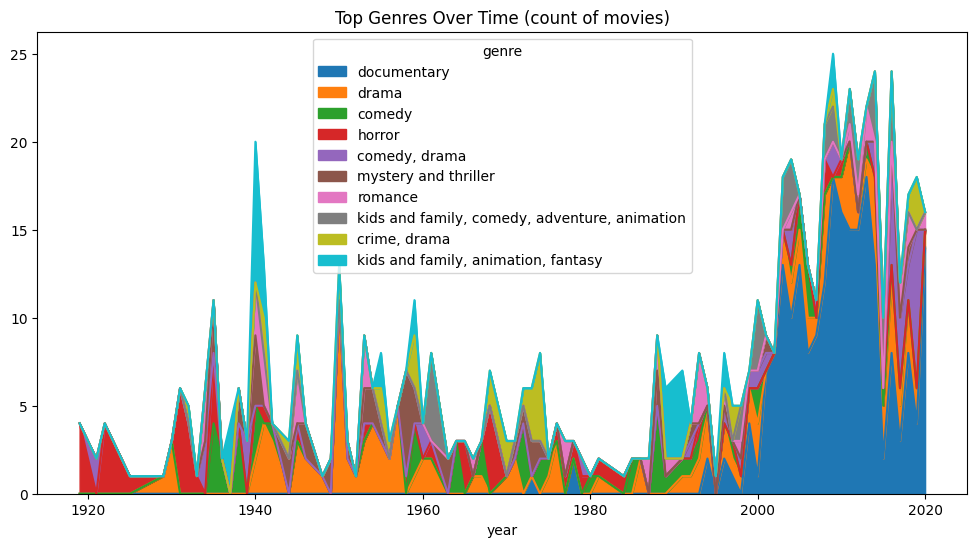

In [ ]:
# average people_score by year
yearly = df.groupby("year").agg({
    "people_score":"mean",
    "critic_score":"mean",
    "title":"count"
}).rename(columns={"title":"movie_count"}).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x="year", y="people_score", label="people")
sns.lineplot(data=yearly, x="year", y="critic_score", label="critic")
plt.title("Average Ratings by Year")
plt.legend()
plt.show()

# Genre popularity over time: top genres and their counts per year
top_genres = df["genre"].value_counts().head(10).index.tolist()
df_top_genres = df[df["genre"].isin(top_genres)]
pivot = df_top_genres.groupby(["year","genre"]).size().unstack(fill_value=0)
pivot[top_genres].plot(kind="area", figsize=(12,6))
plt.title("Top Genres Over Time (count of movies)")
plt.show()


In [ ]:
import joblib
# (models already saved earlier)
joblib.dump(sia, "vader_sia.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")


['tfidf_vectorizer.joblib']

In [ ]:
def top_n_by(col, n=10, ascending=False):
    return df.sort_values(by=col, ascending=ascending)[["title","year","genre",col]].head(n)

# examples
top_n_by("people_score", 10)
top_n_by("critic_score", 10)
top_n_by("gap", 10)


,title,year,genre,gap
1607,American Outlaws,2001,"western, action",54.0
1598,Forsaken,2015,"western, drama",45.0
1519,I Am,2010,documentary,44.0
1468,Playing for Keeps,2012,romance,37.0
1465,Goal! The Dream Begins,2005,drama,35.0
1464,Beerfest,2006,comedy,34.0
1461,First Descent,2005,documentary,34.0
1606,September Dawn,2006,"drama, history, western",33.0
1523,Pokémon 3: The Movie,2001,"kids and family, adventure, anime",32.0
1455,Dust to Glory,2005,documentary,31.0
